In [8]:
%load_ext autoreload
%autoreload 2

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np; np.set_printoptions(precision=2); np.random.seed(0)
import torch; torch.set_printoptions(precision=2)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12); plt.rc('font', family='Arial'); plt.rcParams.update({'font.size': 12})
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl

import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
# import datetime
# import pickle
# import copy
# import pandas as pd
import scipy
import os
from textwrap import wrap


# from sklearn.cluster import KMeans
# from sklearn.manifold import MDS
# from sklearn.decomposition import PCA
# from sklearn.metrics.pairwise import cosine_similarity

sys.path.append("../two_module_rnn/code")
os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from model import *
from task import *
from functions import *
from train import *

os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True) 
torch.backends.cudnn.deterministic = True    

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]


success_2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



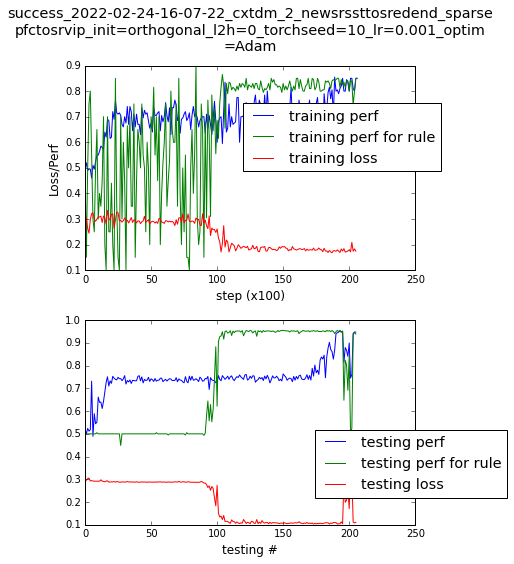

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu_satu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_block': 200000000

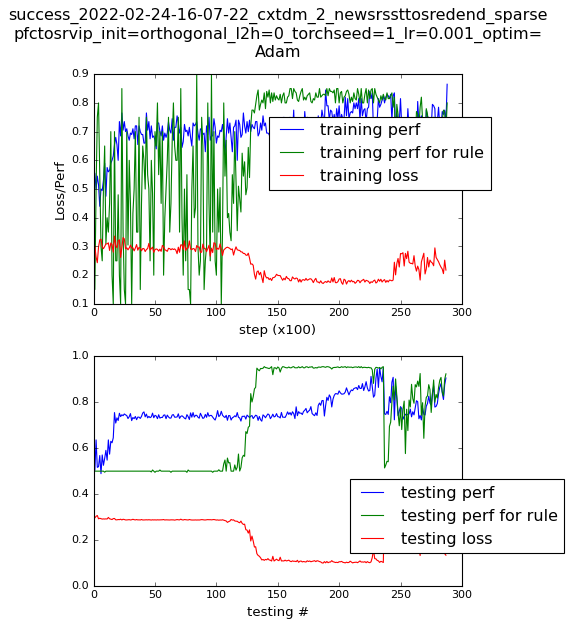

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu_satu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_block': 200000000,

In [10]:
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-24-16-07-22' in model_name:
        print(model_name+'\n')
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, 
                                                                        simple=False, plot=True, toprint=False)
        print(hp_test)

# Look at the dendritic activity & E/I input to each dendrite


success_2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



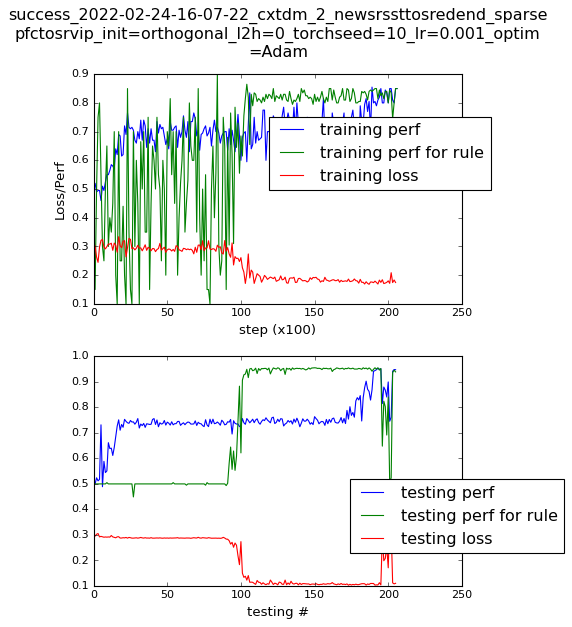

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu_satu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_block': 200000000

TypeError: forward() got an unexpected keyword argument 'init'

In [12]:
plt.rc('font', size=12)

neural_data_all_models = {}
trial_labels_all_models = {}

sigmoid = nn.Sigmoid()

for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-24' in model_name:
        print('\n'+model_name+'\n')
        
        # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)
        
#         if hp_test['structured_sr_sst_to_sr_edend']==False:
#             continue
        print(hp_test)
    
        # make noiseless
#         model.rnn.network_noise = 0
        hp_test['network_noise'] = 0
        hp_test['input_noise_perceptual'] = 0
        hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, hp_test=hp_test, hp_task_test=hp_task_test)
        neural_data_all_models[model_name] = neural_data
        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        rnn_activity = rnn_activity.detach().numpy()
        current_matrix = neural_data['current_matrix']
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
        trial_labels_all_models[model_name] = trial_labels
        rule1_trs_stable = trial_labels['rule1_trs_stable']
        rule2_trs_stable = trial_labels['rule2_trs_stable']
    
    
    
        #=== analysis ===#
        # if the dendrites are in the nonlinear regime
        # timesteps = np.arange(hp_task_test['trial_history_end']//hp_test['dt'], 
        #                 hp_task_test['stim_start']//hp_test['dt'])
        timesteps = np.arange(hp_task_test['trial_start']//hp_test['dt'], 
                        hp_task_test['trial_end']//hp_test['dt'])
        dend_idx = model.rnn.cg_idx['sr_edend']
        if hp_test['structured_sr_sst_to_sr_edend']==True:
            dend_idx_1 = np.arange(0, len(dend_idx)//2)
            dend_idx_2 = np.arange(len(dend_idx)//2, len(dend_idx))

        # compute average dendritic activity during the ITI of each rule
        rule1_dend_act_iti = rnn_activity[rule1_trs_stable,0,:,:][:,:,timesteps][:,dend_idx,:]
#         print(rule1_dend_act_iti.shape)
        rule1_dend_act_iti = np.mean(rule1_dend_act_iti, axis=(0,-1))
#         print(rule1_dend_act_iti.shape)

        rule2_dend_act_iti = rnn_activity[rule2_trs_stable,0,:,:][:,:,timesteps][:,dend_idx,:]
#         print(rule2_dend_act_iti.shape)
        rule2_dend_act_iti = np.mean(rule2_dend_act_iti, axis=(0,-1))
#         print(rule2_dend_act_iti.shape)

        # look at the exc and inh inputs
        exc_inp_dend_rule1 = current_matrix[np.ix_(rule1_trs_stable,
                                                   model.rnn.cg_idx['pfc_esoma'],
                                                   dend_idx,
                                                   timesteps)]
        exc_inp_dend_rule1 = np.sum(np.mean(exc_inp_dend_rule1, axis=(0,3)), axis=0)


        exc_inp_dend_rule2 = current_matrix[np.ix_(rule2_trs_stable,
                                                   model.rnn.cg_idx['pfc_esoma'],
                                                   dend_idx,
                                                   timesteps)]
        exc_inp_dend_rule2 = np.sum(np.mean(exc_inp_dend_rule2, axis=(0,3)), axis=0)


        inh_inp_dend_rule1 = current_matrix[np.ix_(rule1_trs_stable,
                                                   model.rnn.cg_idx['sr_sst'],
                                                   dend_idx,
                                                   timesteps)]
        inh_inp_dend_rule1 = np.sum(np.mean(inh_inp_dend_rule1, axis=(0,3)), axis=0)

        inh_inp_dend_rule2 = current_matrix[np.ix_(rule2_trs_stable,
                                                   model.rnn.cg_idx['sr_sst'],
                                                   dend_idx,
                                                   timesteps)]
        inh_inp_dend_rule2 = np.sum(np.mean(inh_inp_dend_rule2, axis=(0,3)), axis=0)

#         print(exc_inp_dend_rule1.shape, exc_inp_dend_rule2.shape, inh_inp_dend_rule1.shape, 
#              inh_inp_dend_rule2.shape)
        
        # plot
        fig, ax=plt.subplots(1, 3, figsize=[15,5])
#         fig.suptitle(model.rnn.save_name)
        fig.patch.set_facecolor('white')
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
#         title.set_y(1.05)
        plt.style.use('classic')
        if model.rnn.divisive_dend_ei==True and model.rnn.structured_sr_sst_to_sr_edend==False:
            ax[0].scatter(x=exc_inp_dend_rule1+inh_inp_dend_rule1, 
                          y=exc_inp_dend_rule2+inh_inp_dend_rule2)
        elif model.rnn.divisive_dend_ei==True and model.rnn.structured_sr_sst_to_sr_edend==True:
            ax[0].scatter(x=exc_inp_dend_rule1[dend_idx_1]+inh_inp_dend_rule1[dend_idx_1], 
                          y=exc_inp_dend_rule2[dend_idx_1]+inh_inp_dend_rule2[dend_idx_1], color='blue', alpha=0.5)
            ax[0].scatter(x=exc_inp_dend_rule1[dend_idx_2]+inh_inp_dend_rule1[dend_idx_2], 
                          y=exc_inp_dend_rule2[dend_idx_2]+inh_inp_dend_rule2[dend_idx_2], color='green', alpha=0.5)
        elif model.rnn.divisive_dend_inh==True and model.rnn.structured_sr_sst_to_sr_edend==False:
            ax[0].scatter(x=inh_inp_dend_rule1, y=inh_inp_dend_rule2)
        elif model.rnn.divisive_dend_inh==True and model.rnn.structured_sr_sst_to_sr_edend==True:
            ax[0].scatter(x=inh_inp_dend_rule1[dend_idx_1], y=inh_inp_dend_rule2[dend_idx_1], color='blue', alpha=0.5)
            ax[0].scatter(x=inh_inp_dend_rule1[dend_idx_2], y=inh_inp_dend_rule2[dend_idx_2], color='green', alpha=0.5)
        elif model.rnn.divisive_dend_ei==False and model.rnn.divisive_dend_inh==False and model.rnn.structured_sr_sst_to_sr_edend==False:
            ax[0].scatter(x=rule1_dend_act_iti, y=rule2_dend_act_iti)
        elif model.rnn.divisive_dend_ei==False and model.rnn.divisive_dend_inh==False and model.rnn.structured_sr_sst_to_sr_edend==True:
            ax[0].scatter(x=rule1_dend_act_iti[dend_idx_1], y=rule2_dend_act_iti[dend_idx_1], color='blue', alpha=0.5)
            ax[0].scatter(x=rule1_dend_act_iti[dend_idx_2], y=rule2_dend_act_iti[dend_idx_2], color='green', alpha=0.5)
        ax[0].set_xlabel('mean dendritic activation \nduring ITI of rule 1 trials')
        ax[0].set_ylabel('mean dendritic activation \nduring ITI of rule 2 trials')
        if model.rnn.structured_sr_sst_to_sr_edend==False:
            ax[1].scatter(x=exc_inp_dend_rule1, y=exc_inp_dend_rule2)
        elif model.rnn.structured_sr_sst_to_sr_edend==True:
            ax[1].scatter(x=exc_inp_dend_rule1[dend_idx_1], y=exc_inp_dend_rule2[dend_idx_1], color='blue', alpha=0.5)
            ax[1].scatter(x=exc_inp_dend_rule1[dend_idx_2], y=exc_inp_dend_rule2[dend_idx_2], color='green', alpha=0.5)
        ax[1].set_xlabel('mean exc input to dendrites \nduring ITI of rule 1 trials')
        ax[1].set_ylabel('mean exc input to dendrites \nduring ITI of rule 2 trials')
        if model.rnn.structured_sr_sst_to_sr_edend==False:
            ax[2].scatter(x=inh_inp_dend_rule1, y=inh_inp_dend_rule2)
        elif model.rnn.structured_sr_sst_to_sr_edend==True:
            ax[2].scatter(x=inh_inp_dend_rule1[dend_idx_1], y=inh_inp_dend_rule2[dend_idx_1], color='blue', alpha=0.5)
            ax[2].scatter(x=inh_inp_dend_rule1[dend_idx_2], y=inh_inp_dend_rule2[dend_idx_2], color='green', alpha=0.5)
        ax[2].set_xlabel('mean inh input to dendrites \nduring ITI of rule 1 trials')
        ax[2].set_ylabel('mean inh input to dendrites \nduring ITI of rule 2 trials')
        for i in range(3):
            ax[i].axhline(y=0, linestyle='--', color='k')
            ax[i].axvline(x=0, linestyle='--', color='k')
        fig.tight_layout()
        plt.show()
        
        # plot SR SST & SR VIP activations
        time_period = np.arange(hp_task_test['trial_history_end']//hp_test['dt'], hp_task_test['stim_start']//hp_test['dt'])
        act_rule1 = np.mean(rnn_activity[np.ix_(rule1_trs_stable, [0], np.arange(model.rnn.total_n_neurons), time_period)], axis=(0,1,-1))    # mean activity during rule 1
        act_rule2 = np.mean(rnn_activity[np.ix_(rule2_trs_stable, [0], np.arange(model.rnn.total_n_neurons), time_period)], axis=(0,1,-1))    # mean activity during rule 2

        fig, ax = plt.subplots(1,3,figsize=[12,4])
        plt.style.use('classic')
        title = fig.suptitle("\n".join(wrap(model_name, 60)))
#         title.set_y(1.05)
        fig.patch.set_facecolor('white')
        for cg in ['sr_sst', 'sr_vip', 'sr_pv']:
            if cg=='sr_sst':
                i = 0
            elif cg=='sr_vip':
                i = 1
            elif cg=='sr_pv':
                i = 2
            cg_idx = model.rnn.cg_idx[cg]
            ax[i].set_title(cg)
            if model.rnn.divide_sr_sst_vip==False or (cg!='sr_sst' and cg!='sr_vip'):
                ax[i].scatter(x=act_rule1[cg_idx], y=act_rule2[cg_idx], color='k', s=20, alpha=0.5)
            elif model.rnn.divide_sr_sst_vip==True and (cg=='sr_sst' or cg=='sr_vip'):
                ax[i].scatter(x=act_rule1[cg_idx[:len(cg_idx)//2]], y=act_rule2[cg_idx[:len(cg_idx)//2]], color='blue', s=20, alpha=0.5)
                ax[i].scatter(x=act_rule1[cg_idx[len(cg_idx)//2:]], y=act_rule2[cg_idx[len(cg_idx)//2:]], color='green', s=20, alpha=0.5)                
            ax[i].set_xlabel('Mean activity during rule 1 trials')
            ax[i].set_ylabel('Mean activity during rule 2 trials')
#             if cg=='sr_sst':
#                 for n in model.rnn.cg_idx['sr_sst']:
#                     print('sst unit {}, mean activity during rule 1/2 trials: {}/{}'.format(n, act_rule1[n], act_rule2[n]))
            smallest_act = np.min([np.min(act_rule1[cg_idx]), np.min(act_rule2[cg_idx])])
            largest_act = np.max([np.max(act_rule1[cg_idx]), np.max(act_rule2[cg_idx])])
            ax[i].plot([smallest_act-0.1, largest_act+0.1], [smallest_act-0.1, largest_act+0.1], ls='--', color='k', lw=1)
        fig.tight_layout()
        plt.show()
        
        
        # plot each SR SST and each SR Edend that it projects to
        if hp_test['structured_sr_sst_to_sr_edend']==False:
            continue
        iti_ts = np.arange(hp_task_test['trial_history_end']//hp_test['dt'],  hp_task_test['stim_start']//hp_test['dt'])
        rule1_trs_stable = trial_labels['rule1_trs_stable']
        rule2_trs_stable = trial_labels['rule2_trs_stable']
        n_cols = 4
        fig, ax=plt.subplots(len(model.rnn.cg_idx['sr_sst'])//n_cols+1, n_cols, figsize=[25,12])
        fig.patch.set_facecolor('white')
        row_idx = 0
        col_idx = 0
        for n in model.rnn.cg_idx['sr_sst']:
            dend_connected_idx = [ndend for ndend in model.rnn.cg_idx['sr_edend'] if model.rnn.mask[n,ndend]!=0]
            rule1_dend = np.mean(rnn_activity[np.ix_(rule1_trs_stable, [0], dend_connected_idx, iti_ts)], axis=(0,-1))
            rule2_dend = np.mean(rnn_activity[np.ix_(rule2_trs_stable, [0], dend_connected_idx, iti_ts)], axis=(0,-1))
            rule1_sst = np.mean(rnn_activity[np.ix_(rule1_trs_stable, [0], [n], iti_ts)], axis=(0,-1))
            rule2_sst = np.mean(rnn_activity[np.ix_(rule2_trs_stable, [0], [n], iti_ts)], axis=(0,-1))
            ax[row_idx, col_idx].scatter(x=rule1_dend, y=rule2_dend)
            ax[row_idx, col_idx].scatter(x=rule1_sst, y=rule2_sst, marker='x', color='k', s=50)
            ax[row_idx, col_idx].set_title('SR SST #{}'.format(n))
            ax[row_idx, col_idx].set_xlabel('mean activity during ITI of rule 1')
            ax[row_idx, col_idx].set_ylabel('mean activity during ITI of rule 2')
            
            col_idx += 1
            if col_idx==n_cols:
                col_idx = 0
                row_idx += 1
        fig.tight_layout()
        plt.show()
            


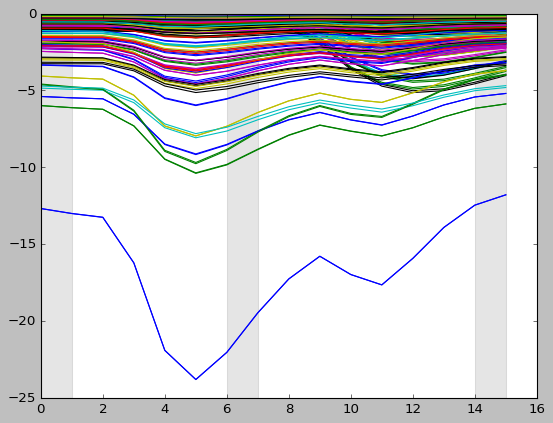

In [136]:
# fig, ax=plt.subplots()
# for n in model.rnn.dend_idx:
#     plt.plot(rnn_activity[10,0,n,:])
# plot_task_epochs(hp=hp_test, hp_task=hp_task_test, ax=ax)


success_2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



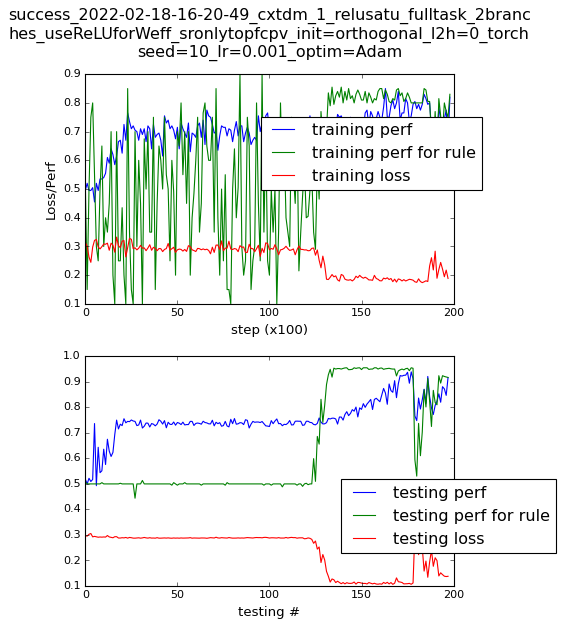

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_

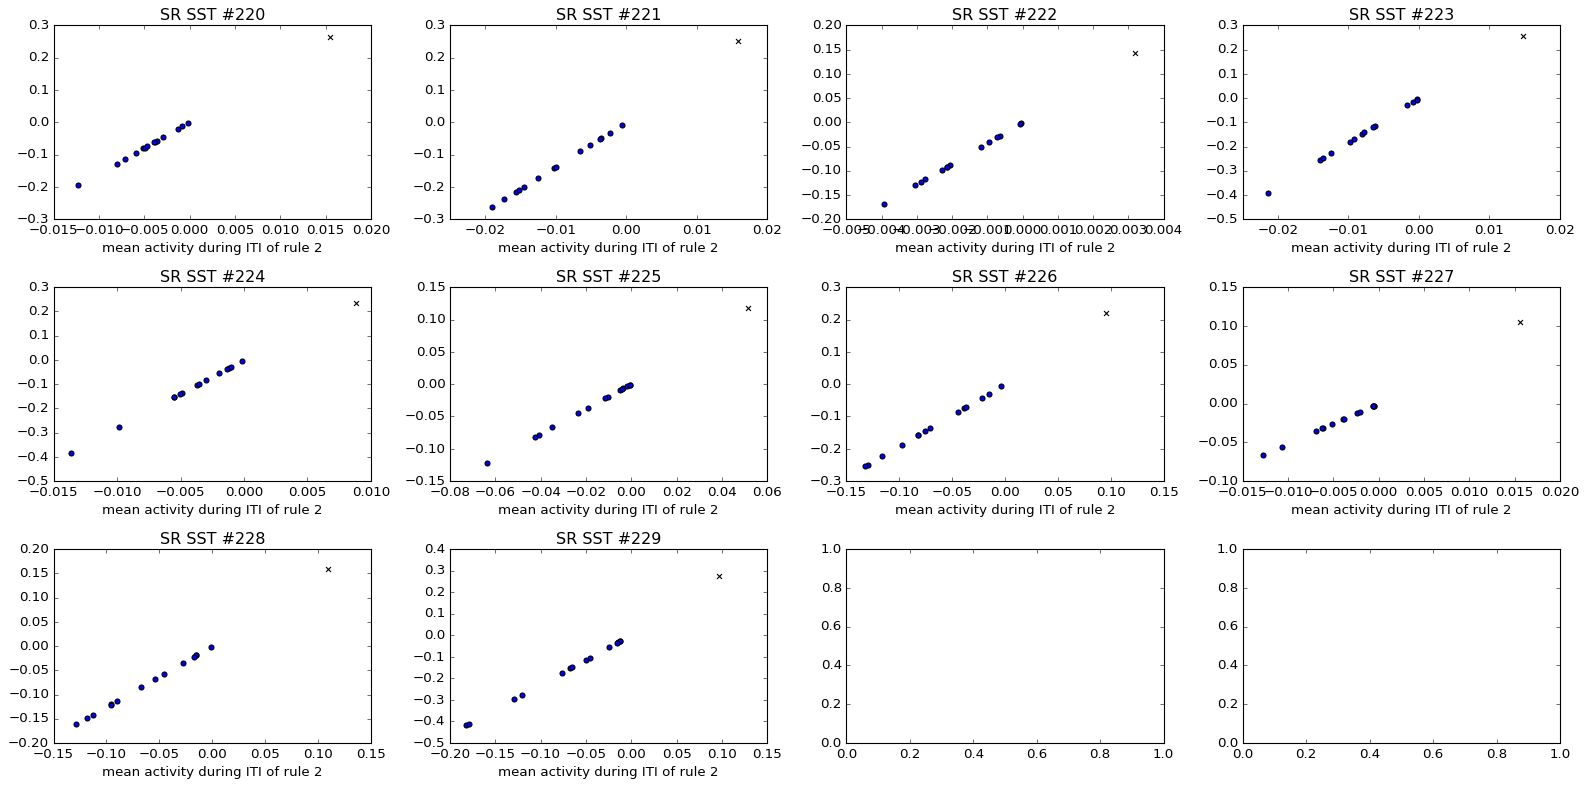


success_2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



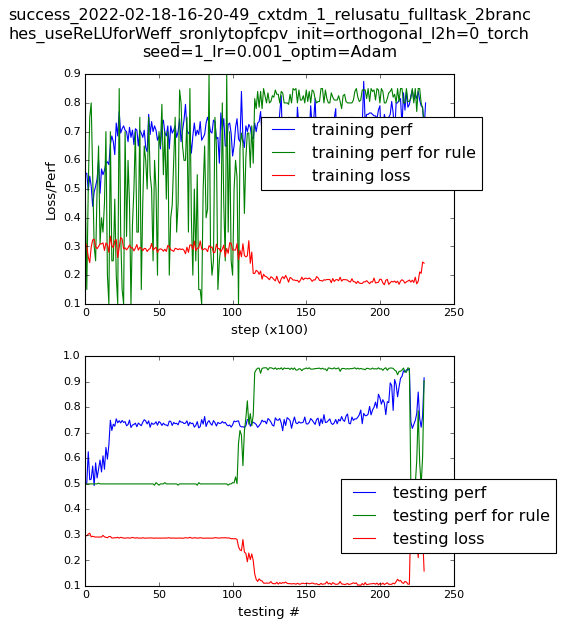

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-18-16-20-49_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_per_b

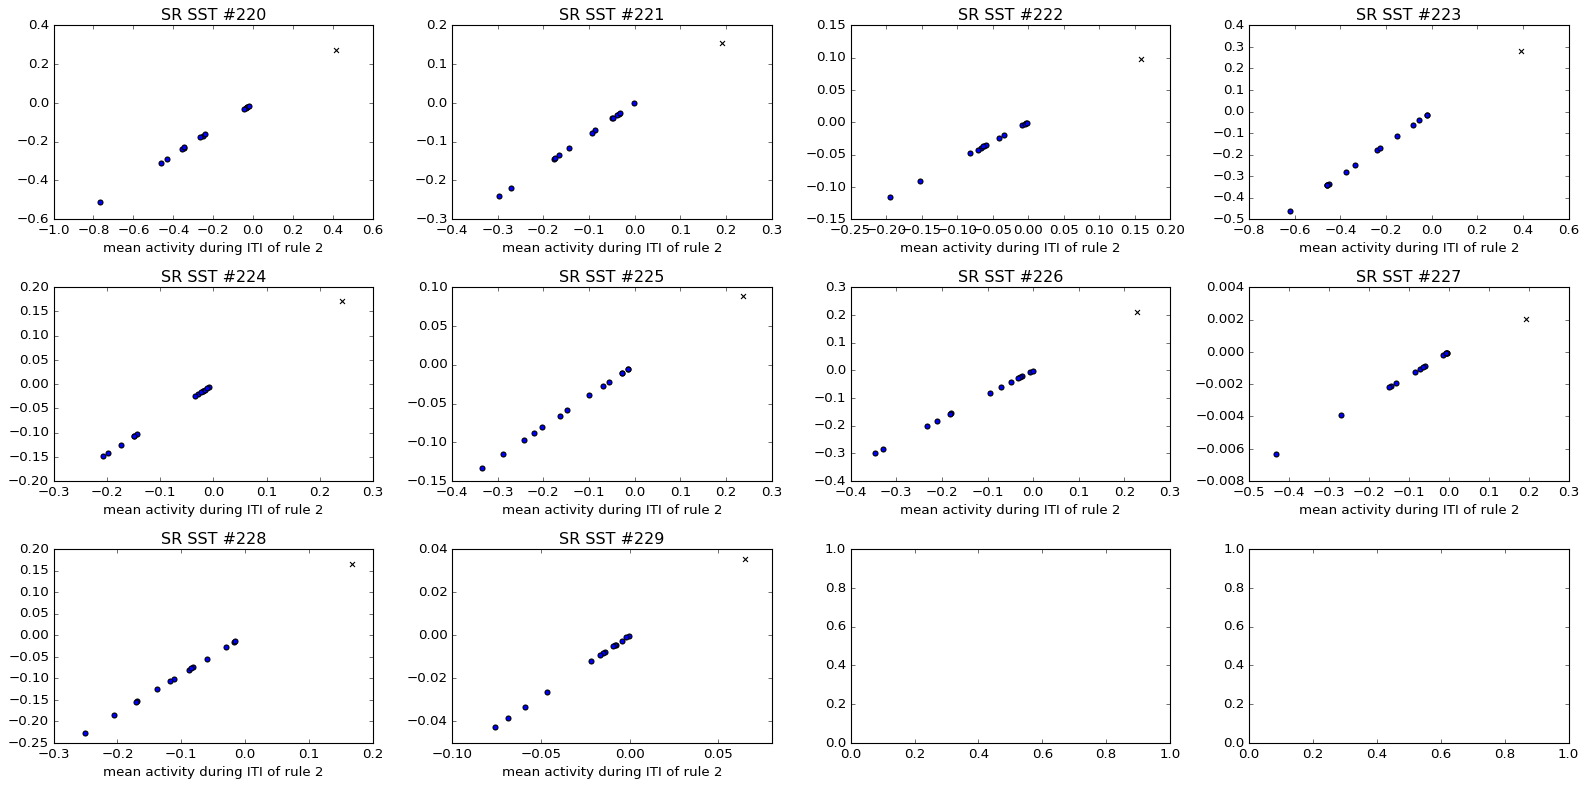


success_2022-02-18-16-20-49_cxtdm_2_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



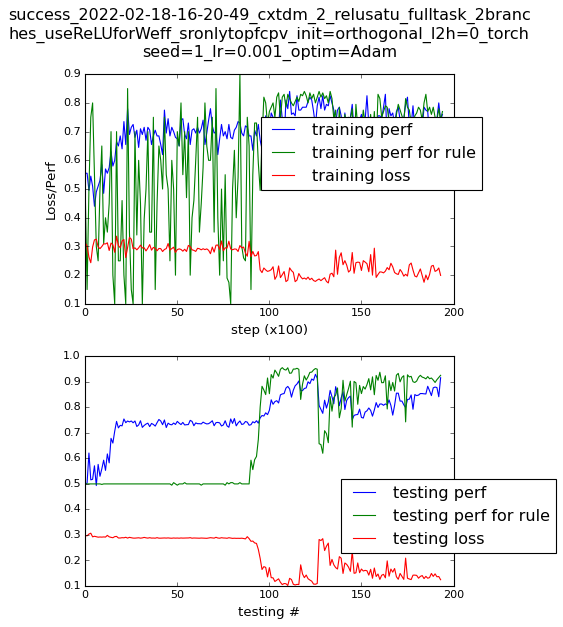

{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu_satu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 140, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': '2022-02-18-16-20-49_cxtdm_2_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'block_len': 20, 'n_switches': 3, 'n_batches_

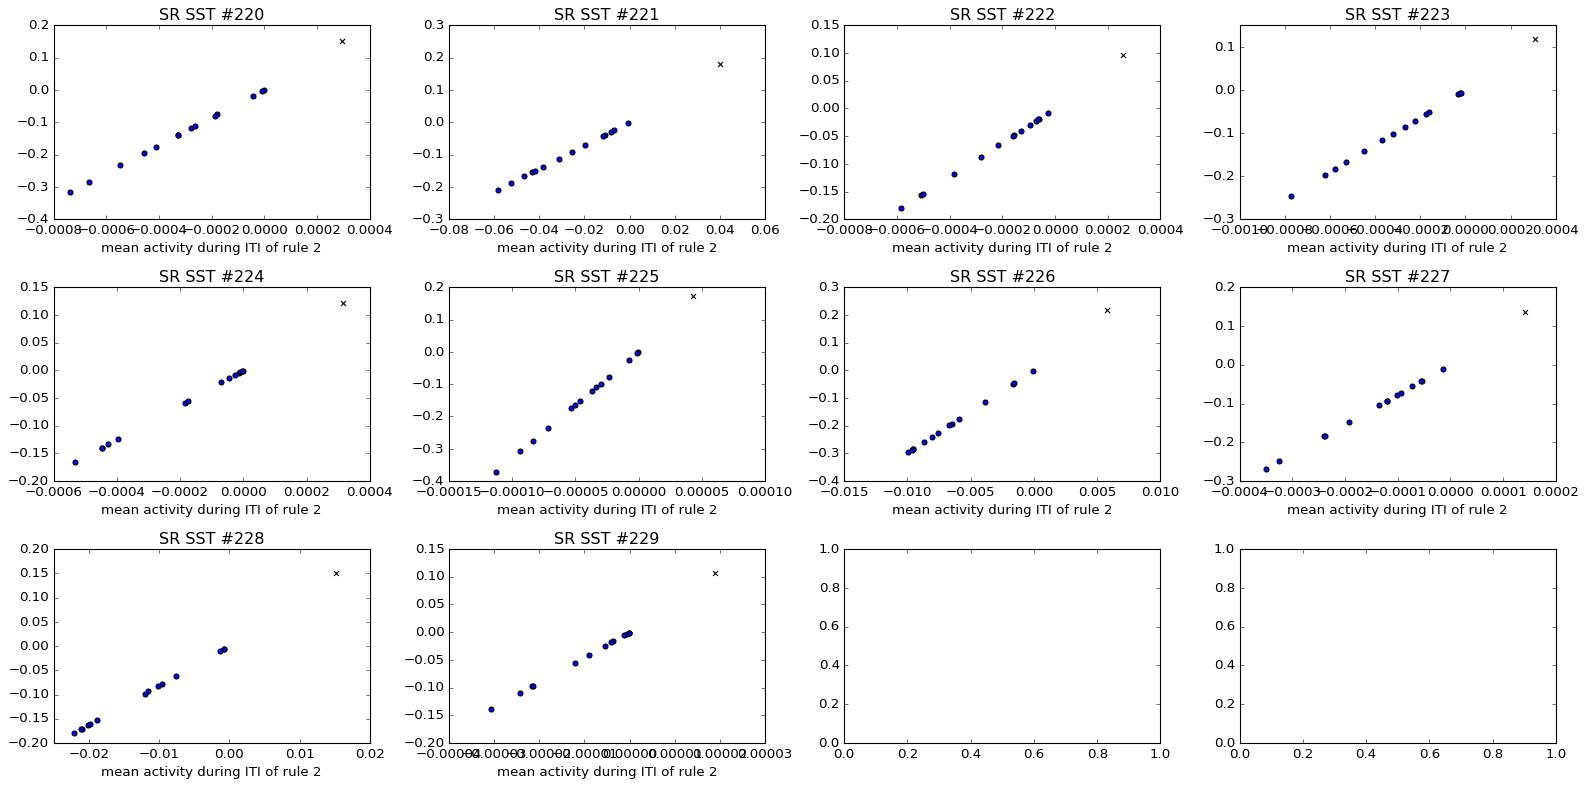


success_2022-02-18-16-20-49_cxtdm_4_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



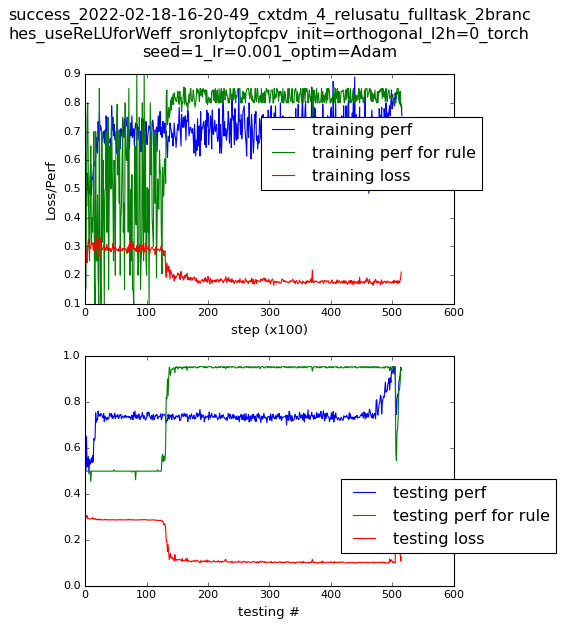

In [244]:
# plot each SR SST and each SR Edend that it projects to
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-18-16-20-49' in model_name:
        print('\n'+model_name+'\n')
        
        # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)
        
        if hp_test['structured_sr_sst_to_sr_edend']==False:
            continue
            
        print(hp_test)
    
        # make noiseless
        hp_test['network_noise'] = 0
        hp_test['input_noise_perceptual'] = 0
        hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, hp_test=hp_test, hp_task_test=hp_task_test)
        neural_data_all_models[model_name] = neural_data
        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        rnn_activity = rnn_activity.detach().numpy()
        current_matrix = neural_data['current_matrix']
        
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
        trial_labels_all_models[model_name] = trial_labels
        rule1_trs_stable = trial_labels['rule1_trs_stable']
        rule2_trs_stable = trial_labels['rule2_trs_stable']
        
        
        #=== analysis ===#
        iti_ts = np.arange(hp_task_test['trial_history_end']//hp_test['dt'],  hp_task_test['stim_start']//hp_test['dt'])
        n_cols = 4
        fig, ax=plt.subplots(len(model.rnn.cg_idx['sr_sst'])//4+1, n_cols, figsize=[20,10])
        fig.patch.set_facecolor('white')
        row_idx = 0
        col_idx = 0
        for n in model.rnn.cg_idx['sr_sst']:
            dend_connected_idx = [ndend for ndend in model.rnn.cg_idx['sr_edend'] if model.rnn.mask[n,ndend]!=0]
            print('n={}, dend_connected_idx={}'.format(n, dend_connected_idx))
            rule1_dend = np.mean(rnn_activity[np.ix_(rule1_trs_stable, [0], dend_connected_idx, iti_ts)], axis=(0,-1))
            print('rule1_dend shape: {}'.format(rule1_dend.shape))
            rule2_dend = np.mean(rnn_activity[np.ix_(rule2_trs_stable, [0], dend_connected_idx, iti_ts)], axis=(0,-1))
            rule1_sst = np.mean(rnn_activity[np.ix_(rule1_trs_stable, [0], [n], iti_ts)], axis=(0,-1))
            rule2_sst = np.mean(rnn_activity[np.ix_(rule2_trs_stable, [0], [n], iti_ts)], axis=(0,-1))
            ax[row_idx, col_idx].scatter(x=rule1_dend, y=rule2_dend)
            ax[row_idx, col_idx].scatter(x=rule1_sst, y=rule2_sst, marker='x', color='k')
            ax[row_idx, col_idx].set_title('SR SST #{}'.format(n))
            ax[row_idx, col_idx].set_xlabel('mean activity during ITI of rule 1')
            ax[row_idx, col_idx].set_xlabel('mean activity during ITI of rule 2')
            
            col_idx += 1
            if col_idx==n_cols:
                col_idx = 0
                row_idx += 1
        fig.tight_layout()
        plt.show()
            

mGluRs set to 0.

initializing. self.tau_me shape:  (140,)
 self.tau_me = [ 100.    105.83  112.01  118.54  125.46  132.77  140.52  148.72  157.39
  166.57  176.29  186.57  197.46  208.98  221.17  234.07  247.72  262.17
  277.47  293.65  310.78  328.91  348.1   368.4   389.89  412.64  436.71
  462.18  489.14  517.68  547.88  579.84  613.66  649.46  687.34  727.44
  769.87  814.78  862.31  912.61  965.85 1022.19 1081.82 1144.93 1211.72
 1282.4  1357.21 1436.38 1520.17 1608.85 1702.7  1802.02 1907.14 2018.39
 2136.14 2260.74 2392.62 2532.19 2679.91 2836.24 3001.69 3176.79 3362.1
 3558.23 3765.79 3985.46 4217.95 4464.   4724.41 5000.    100.    105.83
  112.01  118.54  125.46  132.77  140.52  148.72  157.39  166.57  176.29
  186.57  197.46  208.98  221.17  234.07  247.72  262.17  277.47  293.65
  310.78  328.91  348.1   368.4   389.89  412.64  436.71  462.18  489.14
  517.68  547.88  579.84  613.66  649.46  687.34  727.44  769.87  814.78
  862.31  912.61  965.85 1022.19 1081.82 1144.93 12

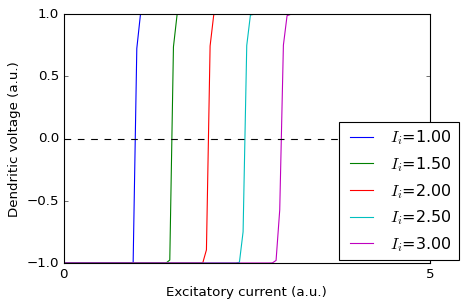

In [137]:
# plot the dendritic nonlinearity
hp, _, _ = get_default_hp()
model = Net_readoutSR(hp)

g_i_list = np.linspace(1, 3, num=5)
g_e_list = np.linspace(0, 5, num=100)
dend_activity = np.zeros([len(g_i_list), len(g_e_list)])
for g_i_id in np.arange(len(g_i_list)):
    g_i = g_i_list[g_i_id]
    for g_e_id in np.arange(len(g_e_list)):
        g_e = g_e_list[g_e_id]
        dend_activity[g_i_id, g_e_id] = model.rnn.nonlinearity_dend(g_e=torch.Tensor([g_e]), 
                                                                    g_i=torch.Tensor([g_i]), 
                                                                    nonlinearity='step')

fig = plt.figure(figsize=[6,4])
plt.rc('font', size=15)
fig.patch.set_facecolor('white')
plt.style.use('classic')
# plt.title('Nonlinear dendrites gate excitation \n Mean I current {:0.4f}, mean E current {:0.4f}'.format(avg_gi, avg_ge))
for g_i_id in np.arange(len(g_i_list)):
    plt.plot(dend_activity[g_i_id,:], label='$I_i$={:0.2f}'.format(g_i_list[g_i_id]))
plt.legend(bbox_to_anchor=(1.1, 0.6))
plt.xlabel('Excitatory current (a.u.)')
plt.ylabel('Dendritic voltage (a.u.)')
plt.axhline(y=model.rnn.nonlinearity_dend(g_e=torch.Tensor([0]), g_i=torch.Tensor([0])), linestyle='--', color='k')
xticks = np.linspace(min(g_e_list), max(g_e_list), num=2, dtype=np.int)
xtickpos = np.linspace(0,len(g_e_list), num=2)
plt.xticks(xtickpos, xticks)
fig.tight_layout()


success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam



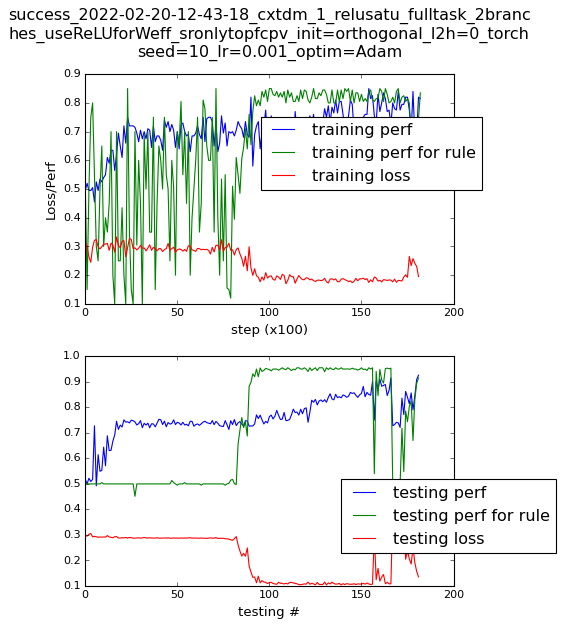

network noise in hp: 0.01
network noise in hp_copy: 0.01
mean test loss=0.1343, mean test perf=0.9000, mean test perf rule=0.9000, max test perf=0.9000, time=4.63s
switch_every_test=10, n_trials_test=100


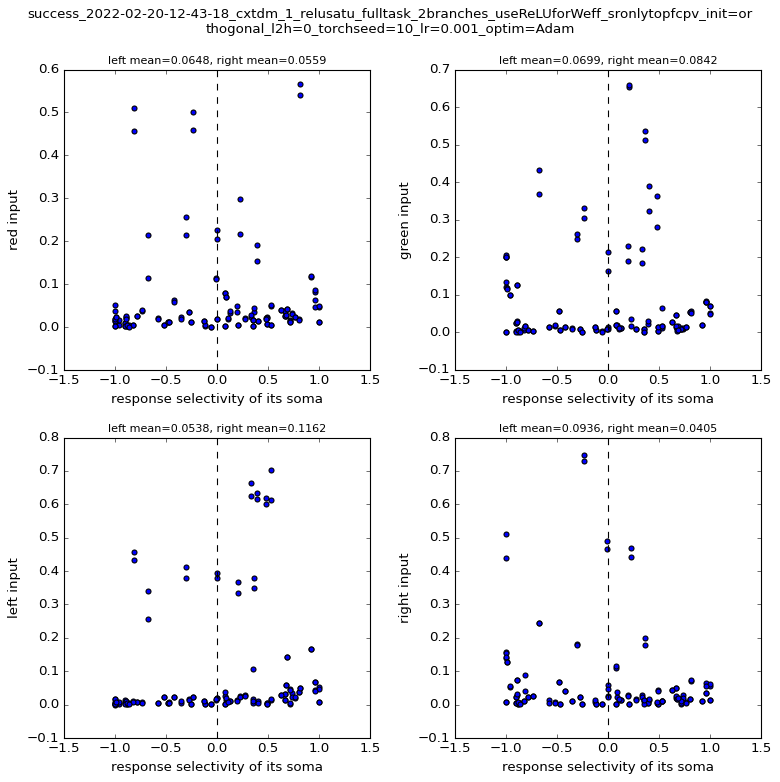


success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



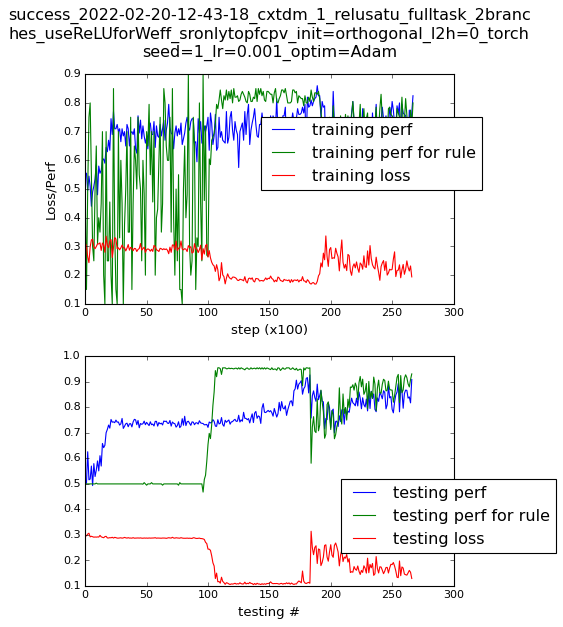

network noise in hp: 0.01
network noise in hp_copy: 0.01
mean test loss=0.1760, mean test perf=0.8600, mean test perf rule=0.8300, max test perf=0.9000, time=4.56s
switch_every_test=10, n_trials_test=100


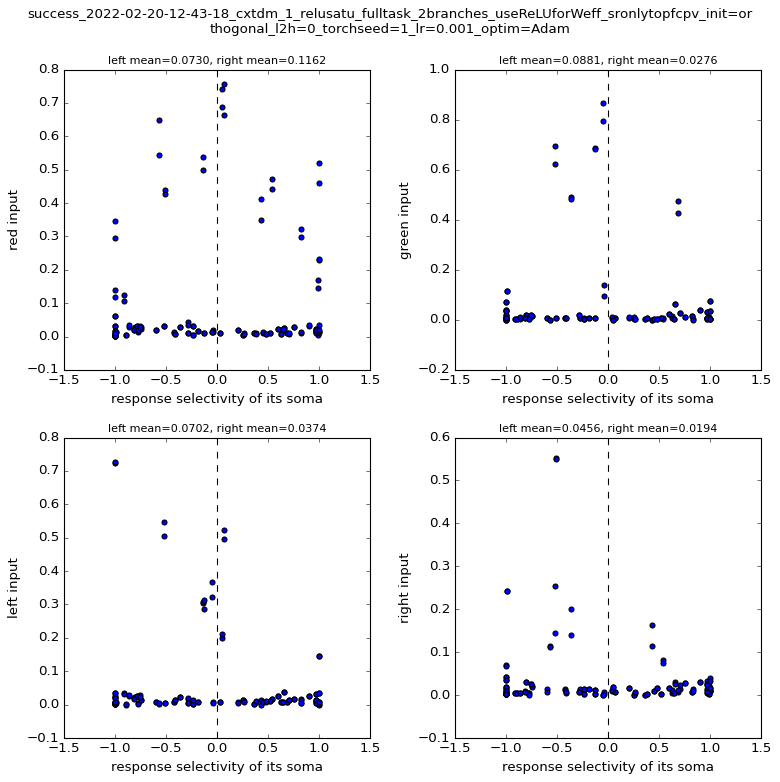


success_2022-02-20-12-43-18_cxtdm_2_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



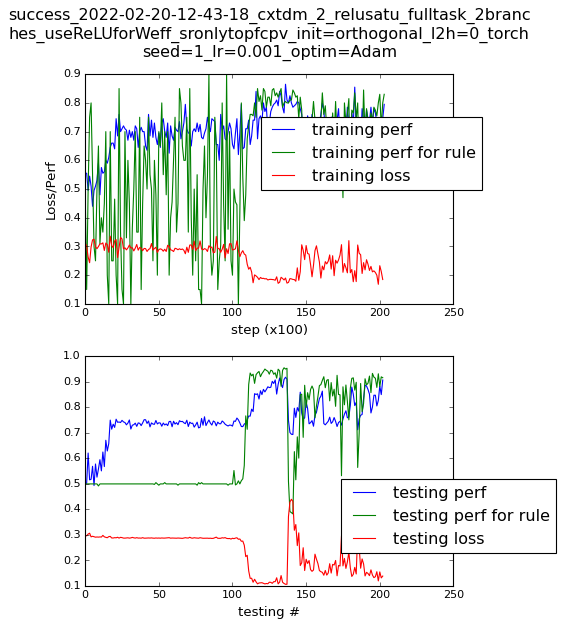

network noise in hp: 0.01
network noise in hp_copy: 0.01
mean test loss=0.1553, mean test perf=0.8600, mean test perf rule=0.8900, max test perf=0.9000, time=3.65s
switch_every_test=10, n_trials_test=100


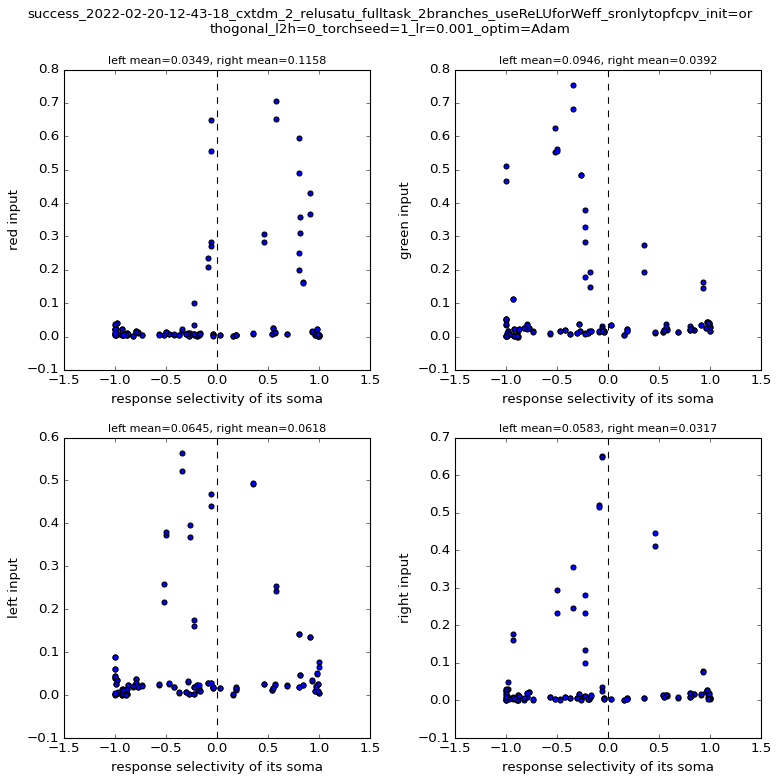

In [278]:
# alignment between sensory input and motor output
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-20-12-43-18_' in model_name:
        print('\n'+model_name+'\n')
        
#         # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)

        # make noiseless
#         model.rnn.network_noise = 0
#         hp_test['input_noise_perceptual'] = 0
#         hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, 
                                        hp_test=hp_test, hp_task_test=hp_task_test)

        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        current_matrix = neural_data['current_matrix']
        
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
#         rule1_trs_stable = trial_labels['rule1_trs_stable']
#         rule2_trs_stable = trial_labels['rule2_trs_stable']
#         rule1_trs_after_error = trial_labels['rule1_trs_after_error']
#         rule2_trs_after_error = trial_labels['rule2_trs_after_error']
#         left_trs_stable = trial_labels['left_trs_stable']
#         right_trs_stable= trial_labels['right_trs_stable']
#         error_trials = trial_labels['error_trials']
        
        # compute cell selectivity
        all_sels = compute_sel_pfc_cxtdm(rnn_activity=rnn_activity, hp=hp_test, hp_task=hp_task_test, 
                                         rule1_trs_stable=trial_labels['rule1_trs_stable'], rule2_trs_stable=trial_labels['rule2_trs_stable'],
                                         left_trs_stable=trial_labels['left_trs_stable'], right_trs_stable=trial_labels['right_trs_stable'], 
                                         stims=test_data['stims'], error_trials=trial_labels['error_trials'])
        resp_sel_normalized = all_sels['resp_normalized']
        
                
        #=== analysis ===#
        w_in_eff = model.rnn.effective_weight(w=model.rnn.w_in, mask=model.rnn.mask_in)
        w_in_eff = w_in_eff.detach().numpy()
        fig, ax = plt.subplots(2, 2, figsize=[10,10])
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        plt.rc('font', size=15)
        red_l = []    # for the red plot, all the y values in the left half 
        red_r = []
        green_l = []
        green_r = []
        left_l = []
        left_r = []
        right_l = []
        right_r = []
        for n in model.rnn.cg_idx['sr_edend']:
            branch = (n-model.rnn.cg_idx['sr_edend'][0])//len(model.rnn.cg_idx['sr_esoma'])
            soma_id = n-(branch+1)*len(model.rnn.cg_idx['sr_esoma'])
            resp_sel_soma = resp_sel_normalized[soma_id]
            ax[0,0].scatter(x=resp_sel_soma, y=w_in_eff[1,n])
        #             left_mean = np.mean([w_in_eff[1,n] for n in model.rnn.cg_idx['sr_edend'] if resp_sel_soma[n]<=0])
        #             right_mean = np.mean([w_in_eff[1,n] for n in model.rnn.cg_idx['sr_edend'] if resp_sel_soma[n]<=0])

            ax[0,1].scatter(x=resp_sel_soma, y=w_in_eff[2,n])
            ax[1,0].scatter(x=resp_sel_soma, y=w_in_eff[3,n])
            ax[1,1].scatter(x=resp_sel_soma, y=w_in_eff[4,n])
            if resp_sel_soma<0:
                red_l.append(w_in_eff[1,n])
                green_l.append(w_in_eff[2,n])
                left_l.append(w_in_eff[3,n])
                right_l.append(w_in_eff[4,n])
            elif resp_sel_soma>=0:
                red_r.append(w_in_eff[1,n])
                green_r.append(w_in_eff[2,n])
                left_r.append(w_in_eff[3,n])
                right_r.append(w_in_eff[4,n])
        # print the mean values on the figure
        ax[0,0].set_title('left mean={:0.4f}, right mean={:0.4f}'.format(np.mean(red_l), np.mean(red_r)), fontsize=10)
        ax[0,1].set_title('left mean={:0.4f}, right mean={:0.4f}'.format(np.mean(green_l), np.mean(green_r)), fontsize=10)
        ax[1,0].set_title('left mean={:0.4f}, right mean={:0.4f}'.format(np.mean(left_l), np.mean(left_r)), fontsize=10)
        ax[1,1].set_title('left mean={:0.4f}, right mean={:0.4f}'.format(np.mean(right_l), np.mean(right_r)), fontsize=10)
#         ax[0,0].text(-1, 1, 'mean value\n= {:0.4f}'.format(np.mean(red_l)), fontsize=10)
#         ax[0,0].text(0.2, 1, 'mean value\n= {:0.4f}'.format(np.mean(red_r)), fontsize=10)           
#         ax[0,1].text(-1, 1, 'mean value\n= {:0.4f}'.format(np.mean(green_l)), fontsize=10)
#         ax[0,1].text(0.2, 1, 'mean value\n= {:0.4f}'.format(np.mean(green_r)), fontsize=10)
#         ax[1,0].text(-1, 1, 'mean value\n= {:0.4f}'.format(np.mean(left_l)), fontsize=10)
#         ax[1,0].text(0.2, 1, 'mean value\n= {:0.4f}'.format(np.mean(left_r)), fontsize=10)
#         ax[1,1].text(-1, 1, 'mean value\n= {:0.4f}'.format(np.mean(right_l)), fontsize=10)
#         ax[1,1].text(0.2, 1, 'mean value\n= {:0.4f}'.format(np.mean(right_r)), fontsize=10)
        for i in range(2):
            for j in range(2):
                ax[i,j].set_xlabel('response selectivity of its soma')
                ax[i,j].axvline(x=0, linestyle='--', color='k')
        ax[0,0].set_ylabel('red input')
        ax[0,1].set_ylabel('green input')
        ax[1,0].set_ylabel('left input')
        ax[1,1].set_ylabel('right input')
        fig.tight_layout() 
        plt.show()


success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam



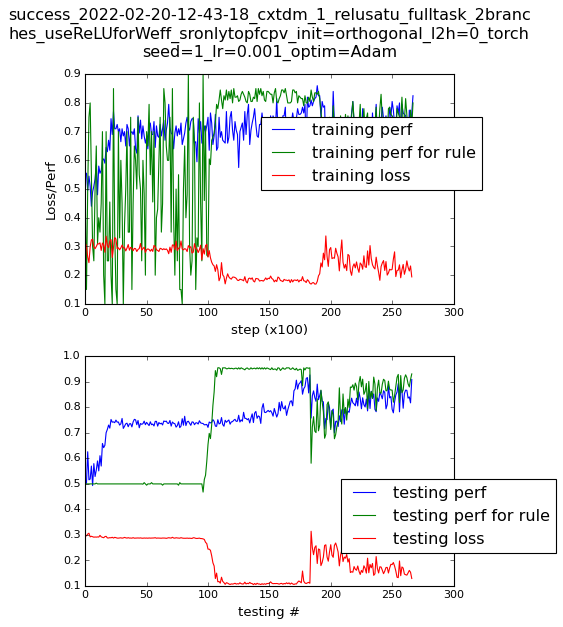

network noise in hp: 0.01
network noise in hp_copy: 0.01
mean test loss=0.1359, mean test perf=0.8600, mean test perf rule=0.9100, max test perf=0.9000, time=3.59s
switch_every_test=10, n_trials_test=100


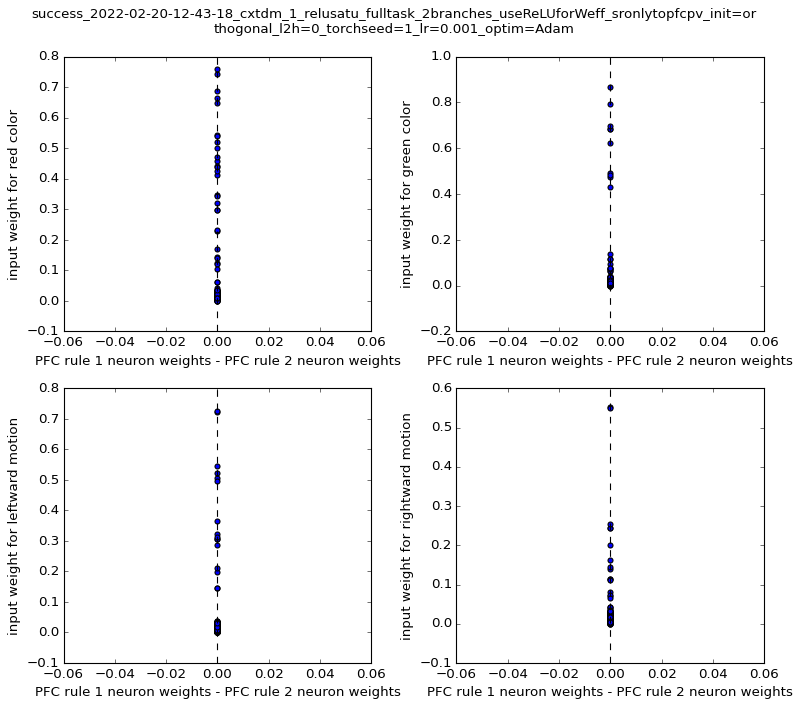

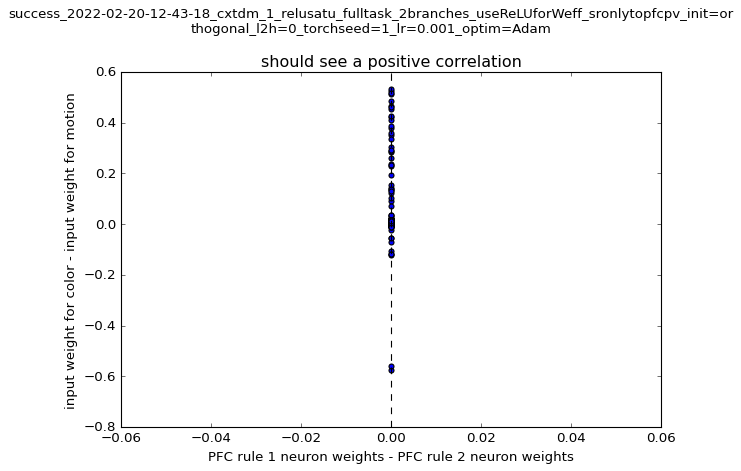

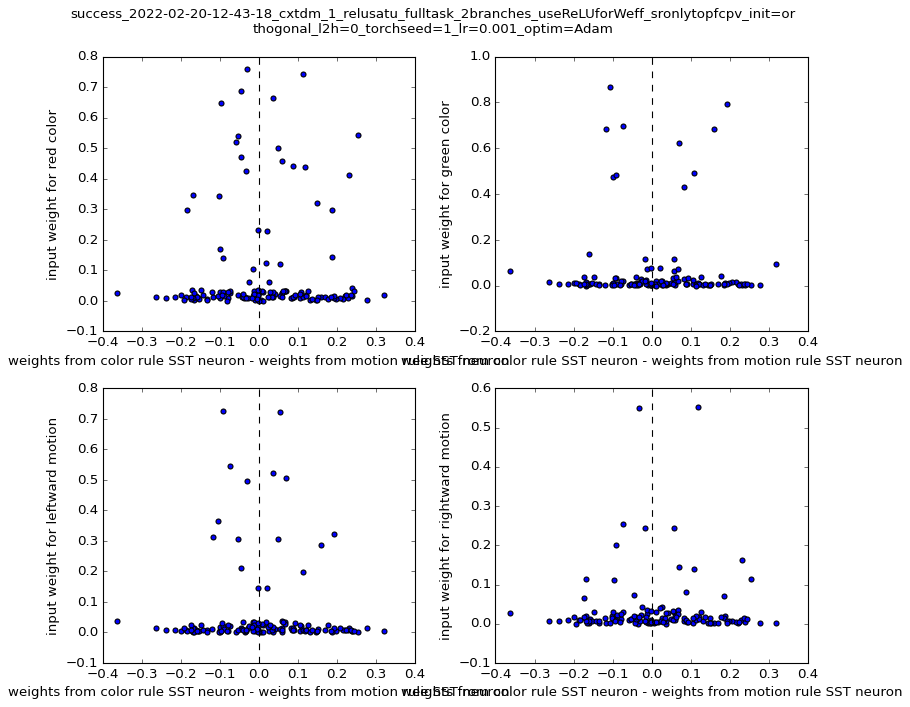

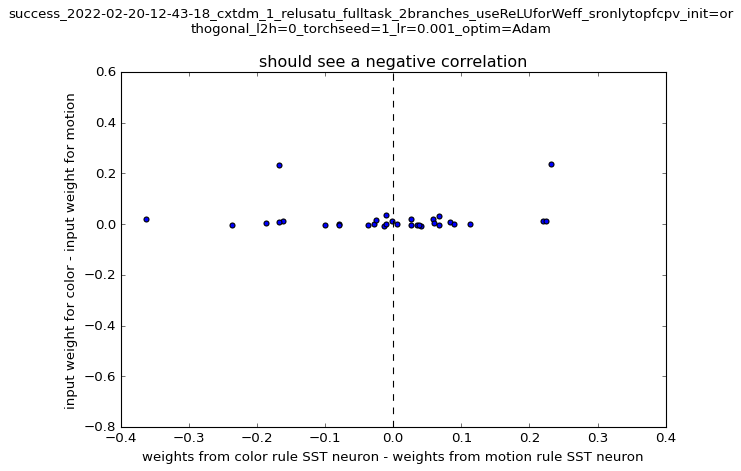

In [297]:
# alignment between top-down and bottom-up inputs

for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if 'success_2022-02-20-12-43-18_cxtdm_1_relusatu_fulltask_2branches_useReLUforWeff_sronlytopfcpv_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam' in model_name:
        print('\n'+model_name+'\n')
        
#         # load model
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file,model_name=model_name, simple=False, plot=True, toprint=False)

        # make noiseless
#         model.rnn.network_noise = 0
#         hp_test['input_noise_perceptual'] = 0
#         hp_test['input_noise_rule'] = 0
        
        # generate some neural data
        neural_data = generate_neural_data_test(model=model, n_trials_test=100, switch_every_test=10, to_plot=False, 
                                        hp_test=hp_test, hp_task_test=hp_task_test)

        test_data = neural_data['test_data']
        rnn_activity = neural_data['rnn_activity']
        current_matrix = neural_data['current_matrix']
        
        # generate trial labels
        trial_labels = label_trials(test_data=test_data)
        rule1_trs_stable = trial_labels['rule1_trs_stable']
        rule2_trs_stable = trial_labels['rule2_trs_stable']
        rule1_trs_after_error = trial_labels['rule1_trs_after_error']
        rule2_trs_after_error = trial_labels['rule2_trs_after_error']
        left_trs_stable = trial_labels['left_trs_stable']
        right_trs_stable= trial_labels['right_trs_stable']
        error_trials = trial_labels['error_trials']
        
        # compute cell selectivity
        all_sels = compute_sel_cxtdm(rnn_activity=rnn_activity, hp=hp_test, hp_task=hp_task_test, 
                                         rule1_trs_stable=trial_labels['rule1_trs_stable'], rule2_trs_stable=trial_labels['rule2_trs_stable'],
                                         left_trs_stable=trial_labels['left_trs_stable'], right_trs_stable=trial_labels['right_trs_stable'], 
                                         stims=test_data['stims'], error_trials=trial_labels['error_trials'])
        resp_sel_normalized = all_sels['resp_normalized']

        # pfc subregions
        subcg_pfc_idx = define_subpop_pfc(model=model, hp_task=hp_task_test, hp=hp_test, rnn_activity=rnn_activity, 
                                          rule_sel=all_sels['rule_normalized_activity'], err_sel=all_sels['error_normalized'], 
                                          rule1_trs_stable=rule1_trs_stable, 
                                          rule2_trs_stable=rule2_trs_stable, 
                                          rule1_after_error_trs=rule1_trs_after_error,
                                          rule2_after_error_trs=rule2_trs_after_error,
                                          rule_threshold=0.5, err_threshold=0.5)
        subcg_sr_idx = define_subpop_sr(model=model, hp_task=hp_task_test, hp=hp_test, rnn_activity=rnn_activity, 
                                          rule_sel=all_sels['rule_normalized_activity'], resp_sel=all_sels['resp_normalized'], 
                                          rule1_trs_stable=rule1_trs_stable, 
                                          rule2_trs_stable=rule2_trs_stable, 
                                          rule_threshold=0, resp_threshold=0)
        for subcg in subcg_pfc_idx.keys():
            model.rnn.cg_idx['subcg_pfc_'+subcg] = subcg_pfc_idx[subcg]
        for subcg in subcg_sr_idx.keys():
            model.rnn.cg_idx['subcg_sr_'+subcg] = subcg_sr_idx[subcg]
            
        #=== analysis ===#
        w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask)
        w_rec_eff = w_rec_eff.detach().numpy()
        w_in_eff = model.rnn.effective_weight(w=model.rnn.w_in, mask=model.rnn.mask_in)
        w_in_eff = w_in_eff.detach().numpy()
        diff_weight_rule_pfc = np.mean(w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_pfc_rule1_esoma'], model.rnn.cg_idx['sr_edend'])], axis=0) \
                            - np.mean(w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_pfc_rule2_esoma'], model.rnn.cg_idx['sr_edend'])], axis=0)        # compute the difference in weights from rule 1 and rule 2 neurons
        diff_weight_rule_pfc = diff_weight_rule_pfc
        
        w_out_eff = (model.rnn.w_out * model.mask_out).detach().numpy()
        w_out_left = w_out_eff[:,0]
        w_out_right = w_out_eff[:,1]
        output_potent_units = [n for n in model.rnn.cg_idx['sr_esoma'] if np.abs(w_out_left[n]-w_out_right[n])>0.2]    # units that influence downstream motor activity
        output_potent_units_dend = []
        for nd in model.rnn.cg_idx['sr_edend']:
            nsoma = (nd-model.rnn.cg_idx['sr_edend'][0])%len(model.rnn.cg_idx['sr_esoma'])    # the soma idx for this dendritic branch
            if nsoma in output_potent_units:
                output_potent_units_dend.append(nd)
        output_potent_units_dend = [n-model.rnn.cg_idx['sr_edend'][0] for n in output_potent_units_dend]    # the first dendrite is 0
            
            
        fig, ax=plt.subplots(2,2, figsize=[10,9])
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        for i in range(2):
            for j in range(2):
                ax[i,j].axvline(x=0, linestyle='--', color='k')
        ax[0,0].scatter(x=diff_weight_rule_pfc, y=w_in_eff[1,model.rnn.cg_idx['sr_edend']])
        ax[0,0].set_xlabel('PFC rule 1 neuron weights - PFC rule 2 neuron weights')
        ax[0,0].set_ylabel('input weight for red color')
        ax[0,1].scatter(x=diff_weight_rule_pfc, y=w_in_eff[2,model.rnn.cg_idx['sr_edend']])
        ax[0,1].set_xlabel('PFC rule 1 neuron weights - PFC rule 2 neuron weights')
        ax[0,1].set_ylabel('input weight for green color')
        ax[1,0].scatter(x=diff_weight_rule_pfc, y=w_in_eff[3,model.rnn.cg_idx['sr_edend']])
        ax[1,0].set_xlabel('PFC rule 1 neuron weights - PFC rule 2 neuron weights')
        ax[1,0].set_ylabel('input weight for leftward motion')
        ax[1,1].scatter(x=diff_weight_rule_pfc, y=w_in_eff[4,model.rnn.cg_idx['sr_edend']])
        ax[1,1].set_xlabel('PFC rule 1 neuron weights - PFC rule 2 neuron weights')
        ax[1,1].set_ylabel('input weight for rightward motion')
        fig.tight_layout()
        plt.show()
        
        # summary plot
        fig, ax=plt.subplots()
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        ax.set_title('should see a positive correlation')
        ax.axvline(x=0, linestyle='--', color='k')
        ax.scatter(x=diff_weight_rule_pfc, 
                   y=((w_in_eff[1,model.rnn.cg_idx['sr_edend']] + w_in_eff[2,model.rnn.cg_idx['sr_edend']]) 
                      - (w_in_eff[3,model.rnn.cg_idx['sr_edend']] + w_in_eff[4,model.rnn.cg_idx['sr_edend']])))
        ax.set_xlabel('PFC rule 1 neuron weights - PFC rule 2 neuron weights')
        ax.set_ylabel('input weight for color - input weight for motion')
        fig.tight_layout()
        plt.show()
        
        
        # how about SST neurons
        diff_weight_rule_sst = np.mean(w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_sr_rule1_sst'], model.rnn.cg_idx['sr_edend'])], axis=0) \
                            - np.mean(w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_sr_rule2_sst'], model.rnn.cg_idx['sr_edend'])], axis=0)        # compute the difference in weights from rule 1 and rule 2 neurons
        diff_weight_rule_sst = diff_weight_rule_sst

        fig, ax=plt.subplots(2,2, figsize=[10,9])
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        for i in range(2):
            for j in range(2):
                ax[i,j].axvline(x=0, linestyle='--', color='k')
        ax[0,0].scatter(x=diff_weight_rule_sst, y=w_in_eff[1,model.rnn.cg_idx['sr_edend']])
        ax[0,0].set_xlabel('weights from color rule SST neuron - weights from motion rule SST neuron')
        ax[0,0].set_ylabel('input weight for red color')
        ax[0,1].scatter(x=diff_weight_rule_sst, y=w_in_eff[2,model.rnn.cg_idx['sr_edend']])
        ax[0,1].set_xlabel('weights from color rule SST neuron - weights from motion rule SST neuron')
        ax[0,1].set_ylabel('input weight for green color')
        ax[1,0].scatter(x=diff_weight_rule_sst, y=w_in_eff[3,model.rnn.cg_idx['sr_edend']])
        ax[1,0].set_xlabel('weights from color rule SST neuron - weights from motion rule SST neuron')
        ax[1,0].set_ylabel('input weight for leftward motion')
        ax[1,1].scatter(x=diff_weight_rule_sst, y=w_in_eff[4,model.rnn.cg_idx['sr_edend']])
        ax[1,1].set_xlabel('weights from color rule SST neuron - weights from motion rule SST neuron')
        ax[1,1].set_ylabel('input weight for rightward motion')
        fig.tight_layout()
        plt.show()

        # summary plot
        diff_w_in = (w_in_eff[1,model.rnn.cg_idx['sr_edend']] + w_in_eff[2,model.rnn.cg_idx['sr_edend']]) - (w_in_eff[3,model.rnn.cg_idx['sr_edend']] + w_in_eff[4,model.rnn.cg_idx['sr_edend']])    # difference of the input weight for the two rules
        fig, ax=plt.subplots()
        title = fig.suptitle("\n".join(wrap(model_name, 100)))
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        ax.set_title('should see a negative correlation')
        ax.axvline(x=0, linestyle='--', color='k')
        ax.scatter(x=diff_weight_rule_sst[output_potent_units_dend], y=diff_w_in[output_potent_units_dend])
        ax.set_xlabel('weights from color rule SST neuron - weights from motion rule SST neuron')
        ax.set_ylabel('input weight for color - input weight for motion')
#         ax.set_ylim([-0.8, 0.6])
#         ax.set_xlim([-0.4, 0.4])
        fig.tight_layout()
        plt.show()

In [293]:
output_potent_units_dend-70

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [291]:
diff_weight_rule_sst.shape

(140,)

# Other code

In [ ]:
# plot single neuron activity within a trial

n_to_plot = 20
plt.rc('font', size=12)
cgs = ['sr_vip', 'sr_sst']
# cgs = ['sr_esoma']
# cgs = ['sr_edend']
# cgs = model.rnn.cell_group_list

rule_sel_displayed = rule_sel_normalized_activity
resp_sel_displayed = resp_sel_normalized
color_sel_displayed = color_sel
motion_sel_displayed = motion_sel

cmap_grad_color = pl.cm.RdYlGn(np.linspace(0,1,len(allcolors)))
cmap_grad_motion = pl.cm.RdYlGn(np.linspace(0,1,len(allcolors)))

plot_info_rule = [{'name': 'color rule', 'trials': rule1_trs_stable, 'color': 'blue'}, {'name': 'motion rule', 'trials': rule2_trs_stable, 'color': 'green'}]
plot_info_resp = [{'name': 'left', 'trials': left_trs_stable, 'color': 'blue'}, {'name': 'right', 'trials': right_trs_stable, 'color': 'green'}]
plot_info_color = []
i = 0
for c in allcolors:
    name = 'coh color={}'.format(c)
    trs = trs_stable_color[c]
    plot_info_color.append({'name': name, 'trials': trs, 'color': cmap_grad_color[i]})
    i += 1
plot_info_motion = []
i = 0
for m in allmotions:
    name = 'coh motion={}'.format(m)
    trs = trs_stable_motion[m]
    plot_info_motion.append({'name': name, 'trials': trs, 'color': cmap_grad_motion[i]})
    i += 1




sel_sorted = {k: v for k, v in sorted(rule_sel_displayed.items(), key=lambda item: item[1], reverse=True)}

for cg in cgs:
    cg_idx = model.rnn.cg_idx[cg]
    
    cg_idx_sorted = [n for n in sel_sorted.keys() if n in model.rnn.cg_idx[cg]]    # sort cell index based on some selectivity
    cg_idx_unsorted = model.rnn.cg_idx[cg]    # do not sort cells
    
    n_plotted = 0
    
    for n in cg_idx_unsorted:
        n_plotted += 1
        if n_plotted>=n_to_plot:
            break
        print('\n')
            
        fig, ax = plt.subplots(1,4,figsize=[18,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')

        plot_single_cell(ax=ax[0], cg=cg, n=n, var_name='rule', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_rule, hp_task=hp_task_test, hp=hp_test)
        plot_single_cell(ax=ax[1], cg=cg, n=n, var_name='response', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_resp, hp_task=hp_task_test, hp=hp_test)
        plot_single_cell(ax=ax[2], cg=cg, n=n, var_name='color coherence', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_color, hp_task=hp_task_test, hp=hp_test)   
        plot_single_cell(ax=ax[3], cg=cg, n=n, var_name='motion coherence', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_motion, hp_task=hp_task_test, hp=hp_test)

        fig.tight_layout()
        plt.show()
        
        
        if 'soma' in cg:
            # plot the dendritic activity
            for b in range(model.rnn.n_branches):
                n_dend = n + (b+1)*len(model.rnn.cg_idx[cg])
                cg_dend = cg.split('_')[0] + '_dend'
                
                fig, ax = plt.subplots(1,4,figsize=[18,4])
                fig.patch.set_facecolor('white')
                plt.style.use('classic')
                plot_single_cell(ax=ax[0], cg=cg_dend, n=n_dend, var_name='rule', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_rule, hp_task=hp_task_test, hp=hp_test)
                plot_single_cell(ax=ax[1], cg=cg_dend, n=n_dend, var_name='response', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_resp, hp_task=hp_task_test, hp=hp_test)
                plot_single_cell(ax=ax[2], cg=cg_dend, n=n_dend, var_name='color coherence', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_color, hp_task=hp_task_test, hp=hp_test)
                plot_single_cell(ax=ax[3], cg=cg_dend, n=n_dend, var_name='motion coherence', sel=0, rnn_activity=rnn_activity, plot_info=plot_info_motion, hp_task=hp_task_test, hp=hp_test)
        
                fig.tight_layout()
                plt.show()
        
        

In [ ]:
# plot current 

n_to_plot = 10

plt.rc('font', size=12)

# senders = ['sr_sst', 'pfc_esoma']
# receivers = ['sr_edend']

senders = ['sr_sst', 'pfc_esoma']
receivers = ['sr_edend']


for r in receivers:
    n_plotted = 0
    for n in model.rnn.cg_idx[r]: 
        n_plotted += 1
        if n_plotted>=n_to_plot:
            break
        print('\n')

        # plot the single cell activity
        fig, ax = plt.subplots(1,4,figsize=[18,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')

        plot_single_cell(ax=ax[0], cg=r, n=n, var_name='rule', sel=rule_sel_displayed[n], rnn_activity=rnn_activity, plot_info=plot_info_rule, hp_task=hp_task_test, hp=hp_test)
        plot_single_cell(ax=ax[1], cg=r, n=n, var_name='response', sel=resp_sel_displayed[n], rnn_activity=rnn_activity, plot_info=plot_info_resp, hp_task=hp_task_test, hp=hp_test)
        plot_single_cell(ax=ax[2], cg=r, n=n, var_name='color coherence', sel=color_sel_displayed[n], rnn_activity=rnn_activity, plot_info=plot_info_color, hp_task=hp_task_test, hp=hp_test)   
        plot_single_cell(ax=ax[3], cg=r, n=n, var_name='motion coherence', sel=motion_sel_displayed[n], rnn_activity=rnn_activity, plot_info=plot_info_motion, hp_task=hp_task_test, hp=hp_test)

        fig.tight_layout()
        plt.show()

        for s in senders:
            # plot the current to each neuron in receiver population
            fig, ax = plt.subplots(1,4,figsize=[18,4])
            fig.patch.set_facecolor('white')
            plt.style.use('classic')

            plot_current(ax=ax[0], sender=s, receiver=r, n=n, var_name='rule', current_matrix=current_matrix, plot_info=plot_info_rule, hp_task=hp_task_test, hp=hp_test, model=model)
            plot_current(ax=ax[1], sender=s, receiver=r, n=n, var_name='response', current_matrix=current_matrix, plot_info=plot_info_resp, hp_task=hp_task_test, hp=hp_test, model=model)
            plot_current(ax=ax[2], sender=s, receiver=r, n=n, var_name='color coherence', current_matrix=current_matrix, plot_info=plot_info_color, hp_task=hp_task_test, hp=hp_test, model=model)
            plot_current(ax=ax[3], sender=s, receiver=r, n=n, var_name='motion coherence', current_matrix=current_matrix, plot_info=plot_info_motion, hp_task=hp_task_test, hp=hp_test, model=model)

            fig.tight_layout()
            plt.show()